In [2]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dataset = pd.read_csv('diabetes.csv')

In [4]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

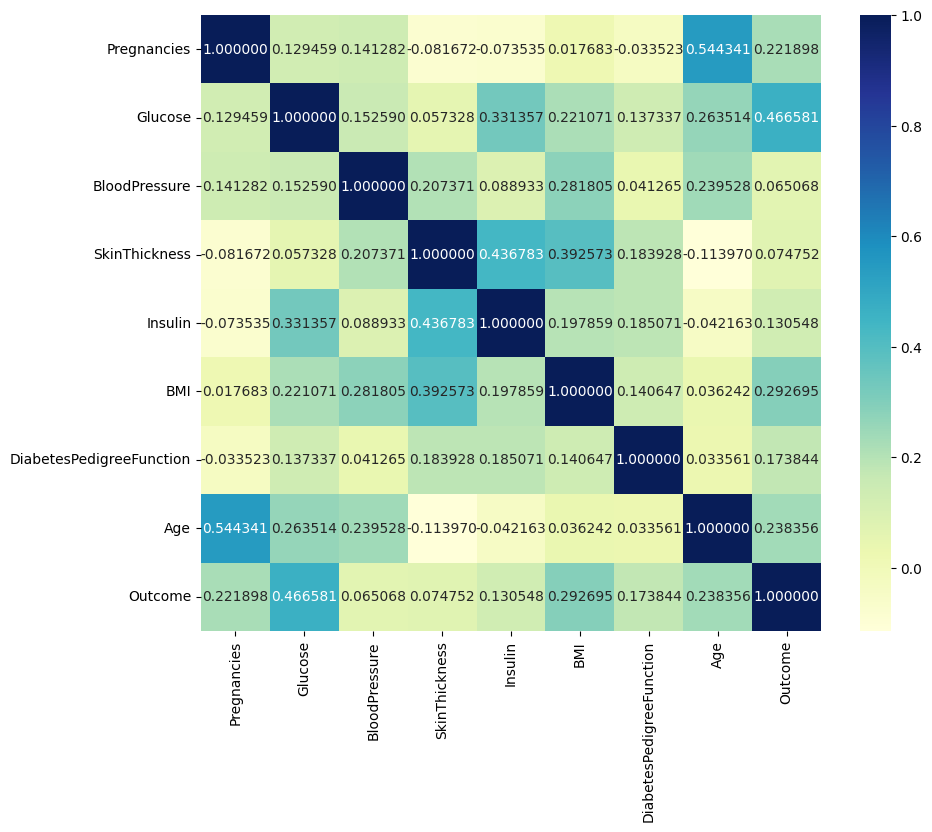

In [23]:
plt.figure(figsize =(10,8))
sb.heatmap(dataset.corr(), annot=True, fmt='3f',cmap="YlGnBu")

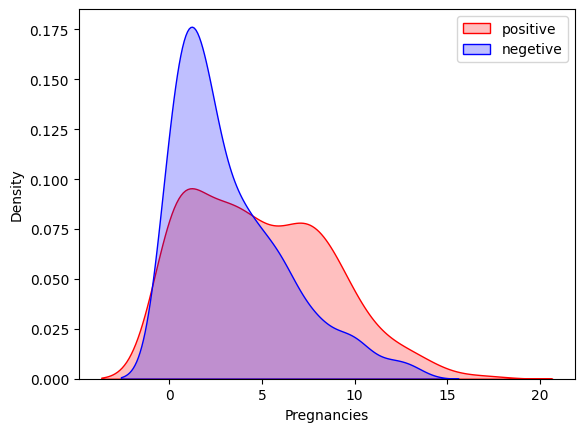

In [12]:
#exploring pregnancies
kde = sb.kdeplot(dataset["Pregnancies"][dataset["Outcome"]==1],color="Red", fill=True)
kde = sb.kdeplot(dataset["Pregnancies"][dataset["Outcome"]==0],color="Blue", fill=True)
kde.legend(["positive","negetive"])

<Axes: xlabel='Outcome', ylabel='Glucose'>

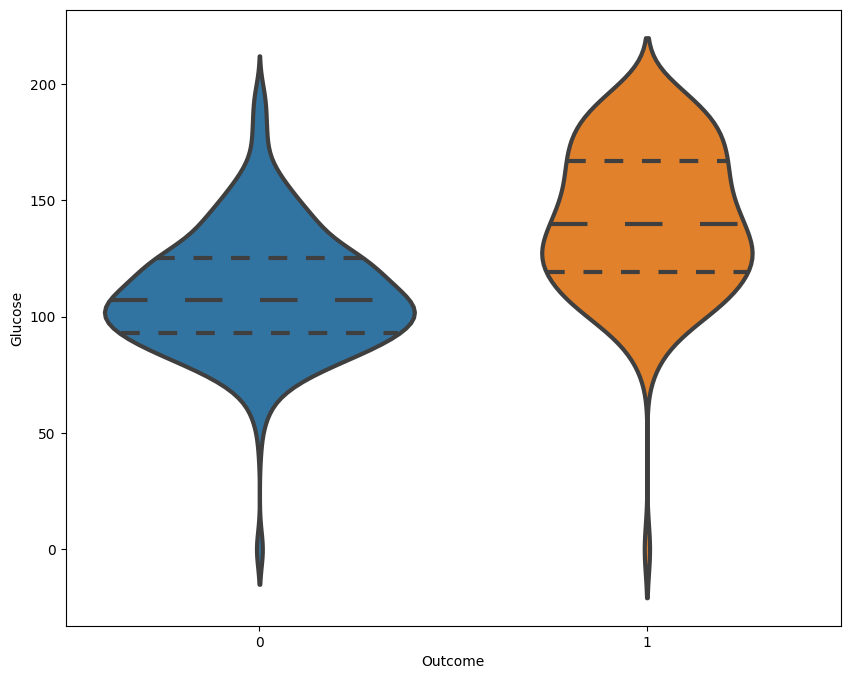

In [20]:
#exploring glucose
plt.figure(figsize=(10,8))
sb.violinplot(data=dataset, x="Outcome", y="Glucose", split=True, linewidth=3, inner="quart")

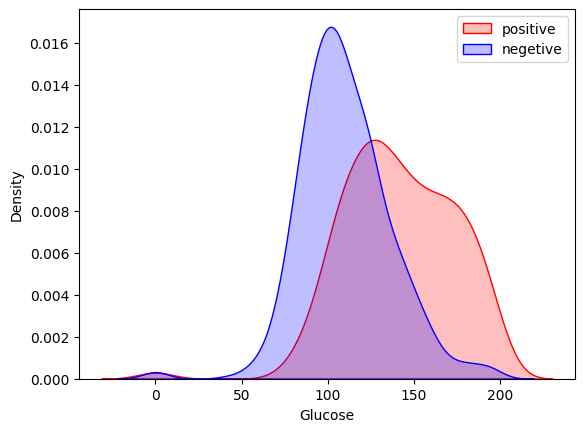

In [21]:
kde = sb.kdeplot(dataset["Glucose"][dataset["Outcome"]==1],color="Red", fill=True)
kde = sb.kdeplot(dataset["Glucose"][dataset["Outcome"]==0],color="Blue", fill=True)
kde.legend(["positive","negetive"])

In [23]:
#Replacing 0 values with mean or median of respective feature
#glucose
dataset["Glucose"]=dataset["Glucose"].replace(0,dataset["Glucose"].median())

#bp
dataset["BloodPressure"]=dataset["BloodPressure"].replace(0,dataset["BloodPressure"].median())

#bmi
dataset["BMI"]=dataset["BMI"].replace(0,dataset["BMI"].mean())

#skinthickness
dataset["SkinThickness"]=dataset["SkinThickness"].replace(0,dataset["SkinThickness"].median())

#insulin
dataset["Insulin"]=dataset["Insulin"].replace(0,dataset["Insulin"].median())

In [24]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63,0
764,2,122,70,27,30.5,36.8,0.340,27,0
765,5,121,72,23,112.0,26.2,0.245,30,0
766,1,126,60,23,30.5,30.1,0.349,47,1


In [33]:
#splitting dependant and independant features
X=dataset.drop(["Outcome"],axis=1)
Y=dataset["Outcome"]

In [34]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,30.5,33.6,0.627,50
1,1,85,66,29,30.5,26.6,0.351,31
2,8,183,64,23,30.5,23.3,0.672,32
3,1,89,66,23,94.0,28.1,0.167,21
4,0,137,40,35,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63
764,2,122,70,27,30.5,36.8,0.340,27
765,5,121,72,23,112.0,26.2,0.245,30
766,1,126,60,23,30.5,30.1,0.349,47


In [35]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [36]:
#splitting dataset into training and testing dataset
from sklearn.model_selection import train_test_split as tts
X_train, X_test, Y_train, Y_test=tts(X,Y,test_size=0.33,random_state=42)

In [41]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
464,10,115,98,23,30.5,24.0,1.022,34
223,7,142,60,33,190.0,28.8,0.687,61
393,4,116,72,12,87.0,22.1,0.463,37
766,1,126,60,23,30.5,30.1,0.349,47
570,3,78,70,23,30.5,32.5,0.270,39
...,...,...,...,...,...,...,...,...
71,5,139,64,35,140.0,28.6,0.411,26
106,1,96,122,23,30.5,22.4,0.207,27
270,10,101,86,37,30.5,45.6,1.136,38
435,0,141,72,23,30.5,42.4,0.205,29


In [42]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,6,98,58,33,190.0,34.0,0.430,43
324,2,112,75,32,30.5,35.7,0.148,21
624,2,108,64,23,30.5,30.8,0.158,21
690,8,107,80,23,30.5,24.6,0.856,34
473,7,136,90,23,30.5,29.9,0.210,50
...,...,...,...,...,...,...,...,...
311,0,106,70,37,148.0,39.4,0.605,22
429,1,95,82,25,180.0,35.0,0.233,43
182,1,117,74,20,23.0,27.7,0.299,21
586,8,143,66,23,30.5,34.9,0.129,41


In [43]:
Y_train

464    0
223    0
393    0
766    1
570    0
      ..
71     0
106    0
270    1
435    1
102    0
Name: Outcome, Length: 514, dtype: int64

In [46]:
Y_test

668    0
324    0
624    0
690    0
473    0
      ..
311    0
429    1
182    0
586    1
679    0
Name: Outcome, Length: 254, dtype: int64

In [48]:
#KNN
from sklearn.neighbors import KNeighborsClassifier as knc

In [50]:
training_accuracy=[]
test_accuracy=[]
for n_neighbors in range (1,11):
    knn = knc(n_neighbors=n_neighbors)
    knn.fit(X_train,Y_train)
    
    #check accuracy score
    training_accuracy.append(knn.score(X_train,Y_train))
    test_accuracy.append(knn.score(X_test,Y_test))

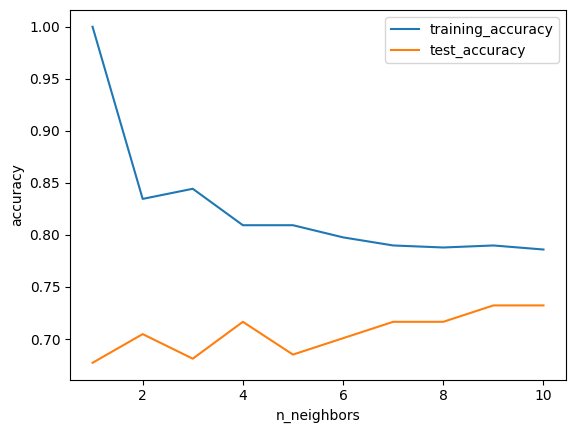

In [52]:
plt.plot(range(1,11),training_accuracy,label="training_accuracy")
plt.plot(range(1,11),test_accuracy,label="test_accuracy")
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [57]:
knn=knc(n_neighbors=9)
knn.fit(X_train,Y_train)
print("training accuracy :",knn.score(X_train,Y_train))
print("test accuracy :",knn.score(X_test,Y_test))

training accuracy : 0.7898832684824902
test accuracy : 0.7322834645669292


In [60]:
from sklearn.tree import DecisionTreeClassifier as dtc
tree=dtc(random_state=0)
tree.fit(X_train,Y_train)
print("training accuracy :",tree.score(X_train,Y_train))
print("test accuracy :",tree.score(X_test,Y_test))

training accuracy : 1.0
test accuracy : 0.6929133858267716


In [105]:
tree1=dtc(random_state=0,max_depth=5)
tree1.fit(X_train,Y_train)
print("training accuracy :",tree1.score(X_train,Y_train))
print("test accuracy :",tree1.score(X_test,Y_test))

training accuracy : 0.8443579766536965
test accuracy : 0.7204724409448819


In [106]:
from sklearn.neural_network import MLPClassifier as mlpc
mlp=mlpc(random_state=44)
mlp.fit(X_train,Y_train)
print("training accuracy :",mlp.score(X_train,Y_train))
print("test accuracy :",mlp.score(X_test,Y_test))

training accuracy : 0.7509727626459144
test accuracy : 0.7204724409448819


In [107]:
from sklearn.preprocessing import StandardScaler as ss
sc=ss()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.fit_transform(X_test)

In [110]:
mlp1=mlpc(random_state=0)
mlp1.fit(X_train_scaled,Y_train)
print("training accuracy :", mlp1.score(X_train_scaled,Y_train))
print("test accuracy :", mlp1.score(X_test_scaled,Y_test))

training accuracy : 0.8365758754863813
test accuracy : 0.7283464566929134


C:\Users\Sunit Mohan\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
